In [1]:
import sys
import cv2
import copy 
sys.path.insert(1, '../../src/')
import matplotlib.pyplot as plt
from wholebodypose.models.rtmpose.model import RTMPoseModel
from wholebodypose.utils.vision import DrawerPose
draw_skeleton = DrawerPose()

In [2]:
from wholebodypose.models.mediapipe.model import MediapipeModel
mode_coco = True
kpt_thr = 0.5
model = MediapipeModel(mode_coco=mode_coco,use_thresholding=True,kpt_thr=0.5)

I0000 00:00:1752828789.008931    1302 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1752828789.053157    1369 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 22.3.6), renderer: llvmpipe (LLVM 15.0.6, 256 bits)
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
I0000 00:00:1752828789.083415    1302 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1752828789.108425    1382 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 22.3.6), renderer: llvmpipe (LLVM 15.0.6, 256 bits)
I0000 00:00:1752828789.163568    1302 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1752828789.194643    1395 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 22.3.6), renderer: llvmpipe (LLVM 15.0.6, 256 bits)


In [3]:
#!pip install onnxruntime-gpu==1.17.1

In [4]:
#!pip install onnxruntime==1.17.1

In [5]:
#!pip uninstall -y onnxruntime

In [6]:
#pip uninstall -y onnxruntime-gpu

In [7]:
#!pip install numpy==1.23.4

In [8]:
#!pip uninstall -y numpy

In [9]:
import numpy
numpy.__version__

'1.23.4'

In [10]:
import cv2
cv2.__version__

'4.11.0'

In [11]:
#!rm -r /root/.cache/rtmlib/hub/checkpoints/

In [12]:
#kpt_thr = 2.5
#model = RTMPoseModel(mode='performance',backend='onnxruntime', device='cpu',use_thresholding=False,filter_noise=True,kpt_thr=kpt_thr)

# Generate Points

In [13]:
ls ../../data/videos/

17165.mp4*  GIVE_24649.mp4*  GIVE_24651.mp4*  GIVE_24660.mp4*  GIVE_69343.mp4*


In [14]:
import traceback
import numpy as np

# define a video capture object 
#vid = cv2.VideoCapture("/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Datasets/wlasl-complete/videos/17165.mp4")#68508.mp4")#54563.mp4")#68914.mp4") 

#vid = cv2.VideoCapture("/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Datasets/WLASL/wlasl-complete-21k/videos/17165.mp4")
#vid = cv2.VideoCapture("/data/cristian/paper_2025/WLASL_videos/WLASL/videos/17165.mp4")

#vid = cv2.VideoCapture("../../data/videos/GIVE_24649.mp4")
vid = cv2.VideoCapture("../../data/videos/17165.mp4")

#vid = cv2.VideoCapture(0)

cv2.namedWindow("frame", cv2.WINDOW_NORMAL) 

list_keypoints = []
list_scores = []
cnt = 0

while(True): 
    
    ret, frame = vid.read() 
    if ret is None or frame is None:
        break
    
    frame = cv2.resize(frame,(640,480))
    #"""
    try:
        frame_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

        keypoints, scores  = model.predict(frame_rgb)
        list_keypoints.append(keypoints[0,:,:])
        list_scores.append(scores[0,:])


        frame_original = draw_skeleton(copy.deepcopy(frame), keypoints, scores, kpt_thr=kpt_thr,
                                    line_width=1,radius=1)
                
        score_value = np.round(scores[0,99],2)
        key_p1 = np.round(keypoints[0,99,0],2)
        key_p2 = np.round(keypoints[0,99,1],2)
        cnt+=1       
        print("cnt:",cnt)

        frame_original = cv2.putText(frame_original, 
                    f'point 99:i={cnt},s={str(score_value)[:4]},k={str(key_p1)[:6]},{str(key_p2)[:6]}', 
                    (10, 30) ,cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0) , 2, cv2.LINE_AA) 
        
        cv2.imshow('frame', frame_original) 
        #cv2.waitKey()
        
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
    except:
        print(traceback.format_exc())
        break
    #"""
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 

cnt: 1
cnt: 2
cnt: 3
cnt: 4
cnt: 5
cnt: 6
cnt: 7
cnt: 8
cnt: 9
cnt: 10
cnt: 11
cnt: 12
cnt: 13
cnt: 14
cnt: 15
cnt: 16
cnt: 17
cnt: 18
cnt: 19
cnt: 20
cnt: 21
cnt: 22
cnt: 23
cnt: 24
cnt: 25
cnt: 26
cnt: 27
cnt: 28
cnt: 29
cnt: 30
cnt: 31
cnt: 32
cnt: 33
cnt: 34
cnt: 35
cnt: 36
cnt: 37
cnt: 38
cnt: 39
cnt: 40
cnt: 41
cnt: 42
cnt: 43
cnt: 44
cnt: 45
cnt: 46
cnt: 47
cnt: 48
cnt: 49
cnt: 50
cnt: 51
cnt: 52
cnt: 53
cnt: 54
cnt: 55
cnt: 56
cnt: 57
cnt: 58
cnt: 59
cnt: 60
cnt: 61
cnt: 62
cnt: 63
cnt: 64
cnt: 65
cnt: 66
cnt: 67
cnt: 68
cnt: 69
cnt: 70
cnt: 71
cnt: 72
cnt: 73
cnt: 74
cnt: 75
cnt: 76
cnt: 77
cnt: 78
cnt: 79
cnt: 80
cnt: 81
cnt: 82
cnt: 83
cnt: 84
cnt: 85
cnt: 86
cnt: 87
cnt: 88
cnt: 89
cnt: 90
cnt: 91
cnt: 92
cnt: 93
cnt: 94


In [15]:
scores

array([[1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
list_keypoints = np.array(list_keypoints)
list_scores = np.array(list_scores)
list_keypoints.shape,list_scores.shape

((94, 133, 2), (94, 133))

# Filtering Code

In [17]:
#!pip install padasip

In [18]:
import cv2
import numpy as np
from padasip.filters import AdaptiveFilter,FilterNLMS

def initialize_adaptive_filter(num_keypoints,mu=0.9):
    filters = []
    for _ in range(num_keypoints):
        #filter_x = AdaptiveFilter(n=1, mu=0.00005, w="zeros")
        #filter_y = AdaptiveFilter(n=1, mu=0.00005, w="zeros")
        
        filter_x = FilterNLMS(2, mu=mu,w="random")
        filter_y = FilterNLMS(2, mu=mu,w="random")
        filter_z = FilterNLMS(2, mu=mu,w="random")

        filters.append((filter_x, filter_y,filter_z))
    return filters

def track_keypoints(t,keypoints,scores, adaptive_filters):
    keypoints_pred = np.zeros_like(keypoints)
    scores_pred    = np.zeros_like(scores)

    for i, keypoint in enumerate(keypoints):
        filter_x, filter_y, filter_z = adaptive_filters[i]
        #if keypoint[0] == 0 and keypoint[1] == 0:
        #print(t,keypoint[0])

        predicted_x = filter_x.predict(x=np.array([t,int(scores[i]>5.5)]))
        predicted_y = filter_y.predict(x=np.array([t,int(scores[i]>5.5)]))
        predicted_s = filter_z.predict(x=np.array([t,int(scores[i]>5.5)]))

        filter_x.adapt(x=np.array([t,int(scores[i]>5.5)]), d=keypoint[0])
        filter_y.adapt(x=np.array([t,int(scores[i]>5.5)]), d=keypoint[1])
        filter_z.adapt(x=np.array([t,int(scores[i]>5.5)]), d=scores[i])
        
        #print("predicted_x:",predicted_x)
        keypoints_pred[i] = [predicted_x, predicted_y]
        scores_pred[i]    = predicted_s
        """
        if scores[i]<5.5:
            # Si el keypoint es 0, utilizar la predicción del filtro adaptativo
            keypoints_pred[i] = [predicted_x, predicted_y]
        else:
            # Si el keypoint es válido, actualizar el filtro adaptativo
            keypoints_pred[i] = [keypoint[0],keypoint[1]]
        """
    return keypoints_pred,scores_pred

In [19]:
#!pip install filterpy

In [20]:
from filterpy.kalman import KalmanFilter
import numpy as np

def track_keypoints(t, keypoints, scores, adaptive_filters,memories=None, 
                    low=0.25, high=0.5, interp_alpha=0.5):
    """
    Entrada:
      keypoints: (N, 2)
      scores: (N,)
      adaptive_filters: lista de filtros (filter_x, filter_y, filter_s)
    Salida:
      keypoints_pred: (N, 2)
      scores_pred: (N,)
    """
    keypoints_pred = np.zeros_like(keypoints)
    scores_pred    = np.zeros_like(scores)

    for i in range(len(keypoints)):
        x, y = keypoints[i]
        score = scores[i]
        filter_x, filter_y, filter_s = adaptive_filters[i]

        input_vec = np.array([t, int(score > high)])

        # Predicciones del filtro
        pred_x = filter_x.predict(x=input_vec)
        pred_y = filter_y.predict(x=input_vec)
        pred_s = filter_s.predict(x=input_vec)

        if score < low:
            # Muy bajo: usar solo la predicción
            filtered_x, filtered_y, filtered_s = pred_x, pred_y, pred_s
        elif score < high:
            # Intermedio: mezclar predicción y punto observado
            filtered_x = interp_alpha * x + (1 - interp_alpha) * pred_x
            filtered_y = interp_alpha * y + (1 - interp_alpha) * pred_y
            filtered_s = interp_alpha * score + (1 - interp_alpha) * pred_s
        else:
            # Alto: confiar completamente en el punto detectado
            filtered_x, filtered_y, filtered_s = x, y, score

        # Actualizar filtros con el valor observado
        filter_x.adapt(x=input_vec, d=x)
        filter_y.adapt(x=input_vec, d=y)
        filter_s.adapt(x=input_vec, d=score)

        keypoints_pred[i] = [filtered_x, filtered_y]
        scores_pred[i] = filtered_s

    return keypoints_pred, scores_pred



In [21]:
class KeypointMemory:
    def __init__(self, window=10):
        self.window = window
        self.last_high_score_frame = -np.inf
        self.last_high_score_kp = None
        self.last_high_score_value = 0

    def update(self, frame_idx, keypoint, score, high_thresh):
        if score >= high_thresh:
            self.last_high_score_frame = frame_idx
            self.last_high_score_kp = keypoint
            self.last_high_score_value = score

    def get(self, frame_idx):
        if frame_idx - self.last_high_score_frame <= self.window:
            return self.last_high_score_kp, self.last_high_score_value
        else:
            return None, None


In [22]:
def track_keypoints(t, keypoints, scores, adaptive_filters, memories,
                    low=0.25, high=0.5, interp_alpha=0.5):
    keypoints_pred = np.zeros_like(keypoints)
    scores_pred    = np.zeros_like(scores)

    for i in range(len(keypoints)):
        x, y = keypoints[i]
        score = scores[i]
        filter_x, filter_y, filter_s = adaptive_filters[i]
        memory = memories[i]

        input_vec = np.array([t, int(score > high)])

        # Predicción del filtro
        pred_x = filter_x.predict(x=input_vec)
        pred_y = filter_y.predict(x=input_vec)
        pred_s = filter_s.predict(x=input_vec)

        if score >= high:
            # Score confiable: usar directamente
            filtered_x, filtered_y, filtered_s = x, y, score
            memory.update(t, [x, y], score, high)
            # Adaptación del filtro con observación actual
            filter_x.adapt(x=input_vec, d=filtered_x)
            filter_y.adapt(x=input_vec, d=filtered_y)
            filter_s.adapt(x=input_vec, d=filtered_s)
            
        elif score < low:
            # Score bajo: ¿puedo mantener último bueno?
            remembered_kp, remembered_score = memory.get(t)
            if remembered_kp is not None:
                filtered_x, filtered_y = remembered_kp
                remembered_score= remembered_score - (0.02 if remembered_score>0 else 0)
                filtered_s = remembered_score
            else:
                # No tengo buena memoria reciente: usar predicción
                filtered_x, filtered_y, filtered_s = pred_x, pred_y, pred_s
            # Adaptación del filtro con observación actual
            filter_x.adapt(x=input_vec, d=x)
            filter_y.adapt(x=input_vec, d=y)
            filter_s.adapt(x=input_vec, d=score)
        else:
            # Interpolación media
            filtered_x = interp_alpha * x + (1 - interp_alpha) * pred_x
            filtered_y = interp_alpha * y + (1 - interp_alpha) * pred_y
            filtered_s = interp_alpha * score + (1 - interp_alpha) * pred_s
            #filtered_x, filtered_y, filtered_s = pred_x, pred_y, pred_s
            memory.update(t, [filtered_x, filtered_y], filtered_s, high)
    
            # Adaptación del filtro con observación actual
            filter_x.adapt(x=input_vec, d=filtered_x)
            filter_y.adapt(x=input_vec, d=filtered_y)
            filter_s.adapt(x=input_vec, d=filtered_s)

        keypoints_pred[i] = [filtered_x, filtered_y]
        scores_pred[i] = filtered_s

    return keypoints_pred, scores_pred


In [23]:
list_keypoints = np.array(list_keypoints)
list_scores = np.array(list_scores)
list_keypoints.shape,list_scores.shape

((94, 133, 2), (94, 133))

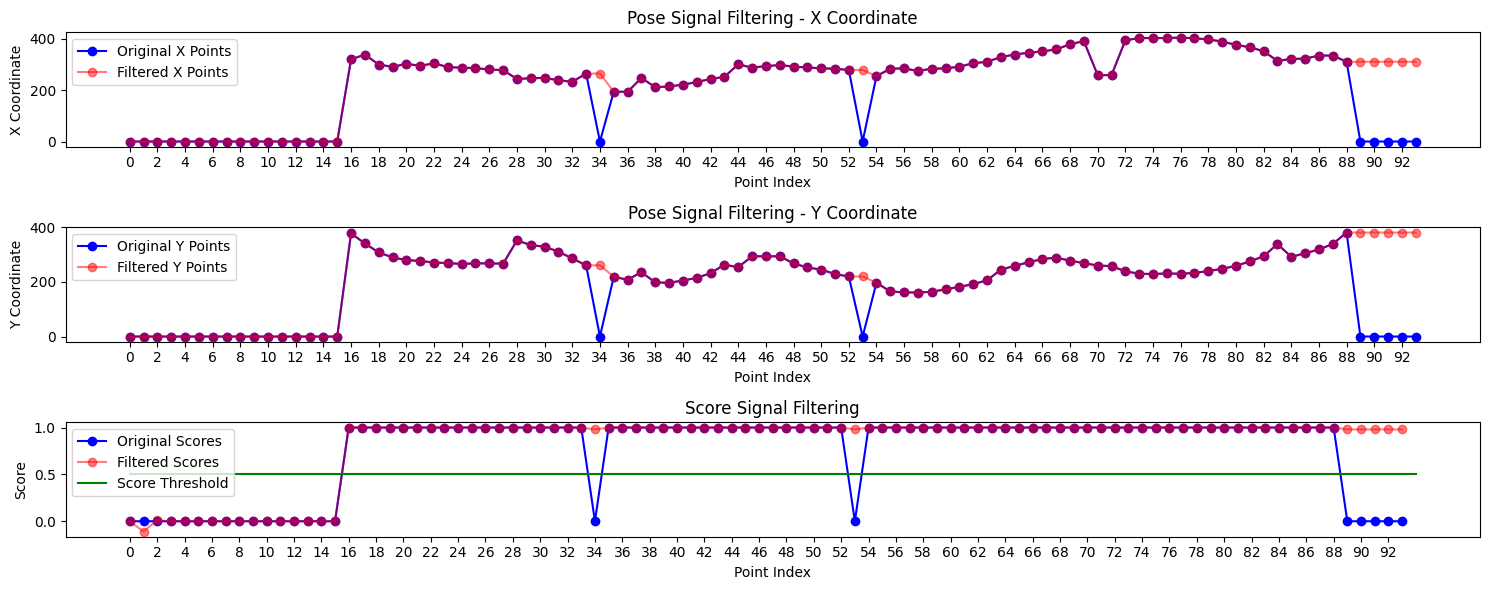

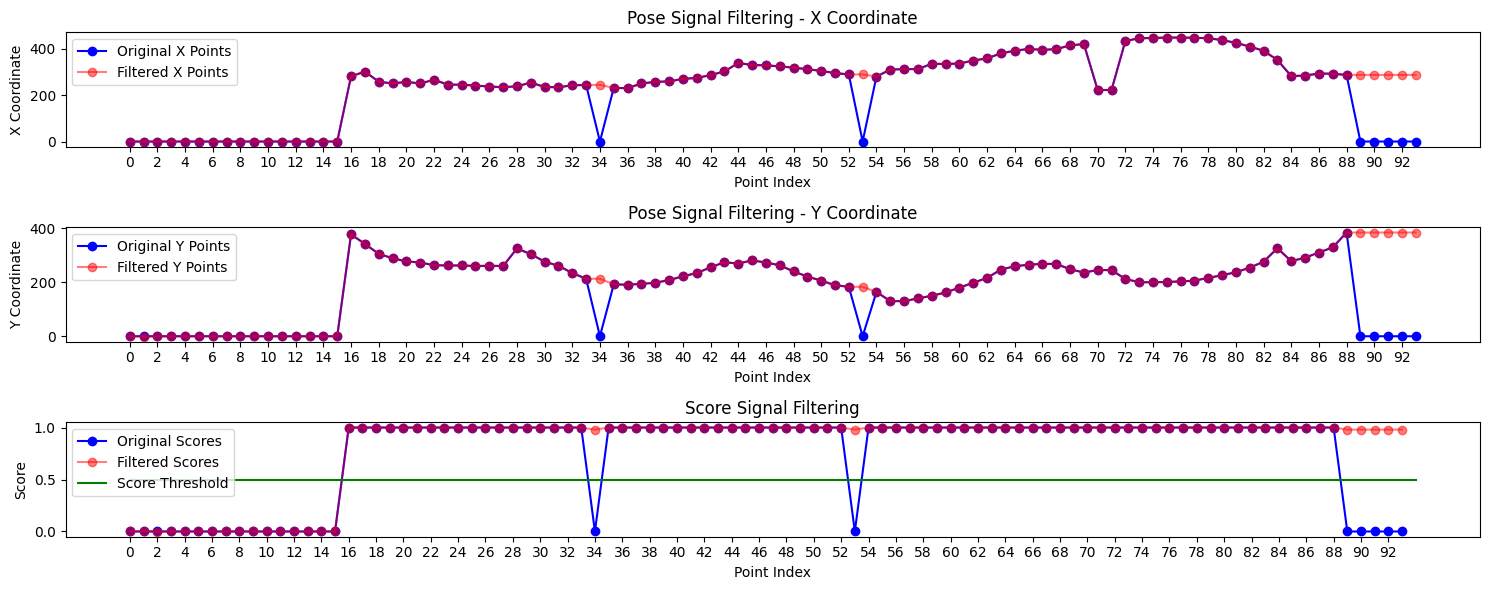

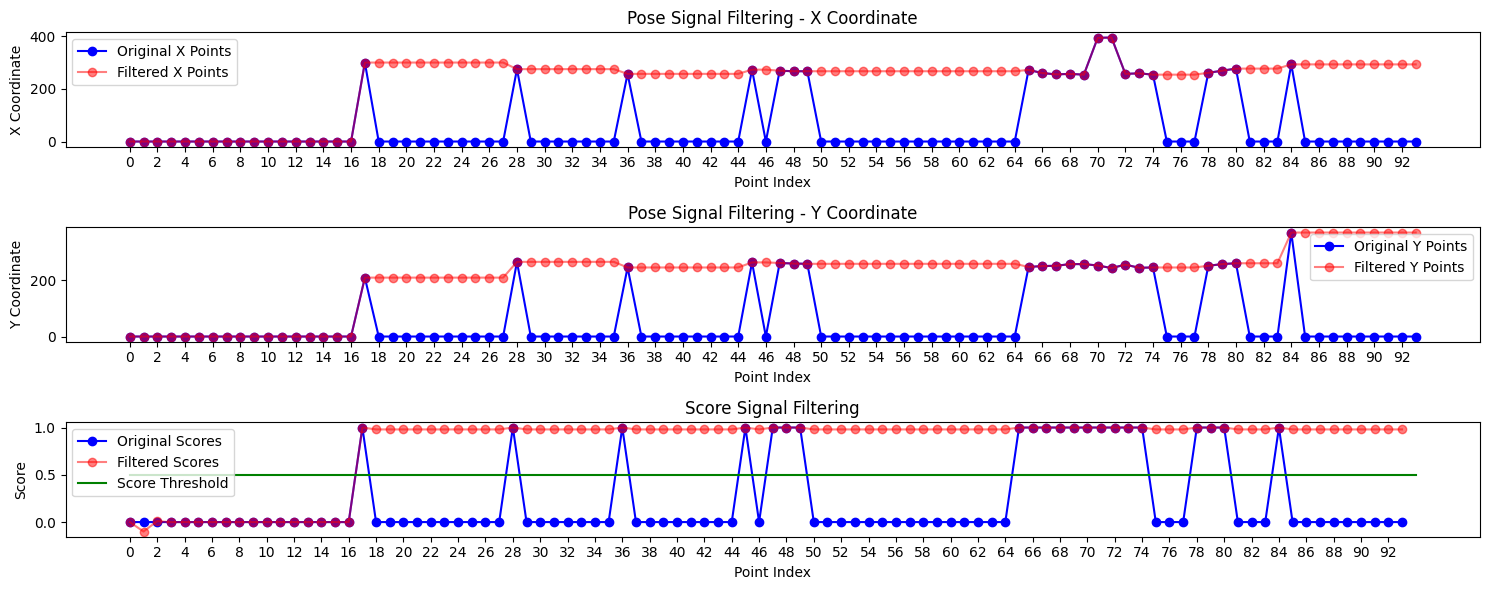

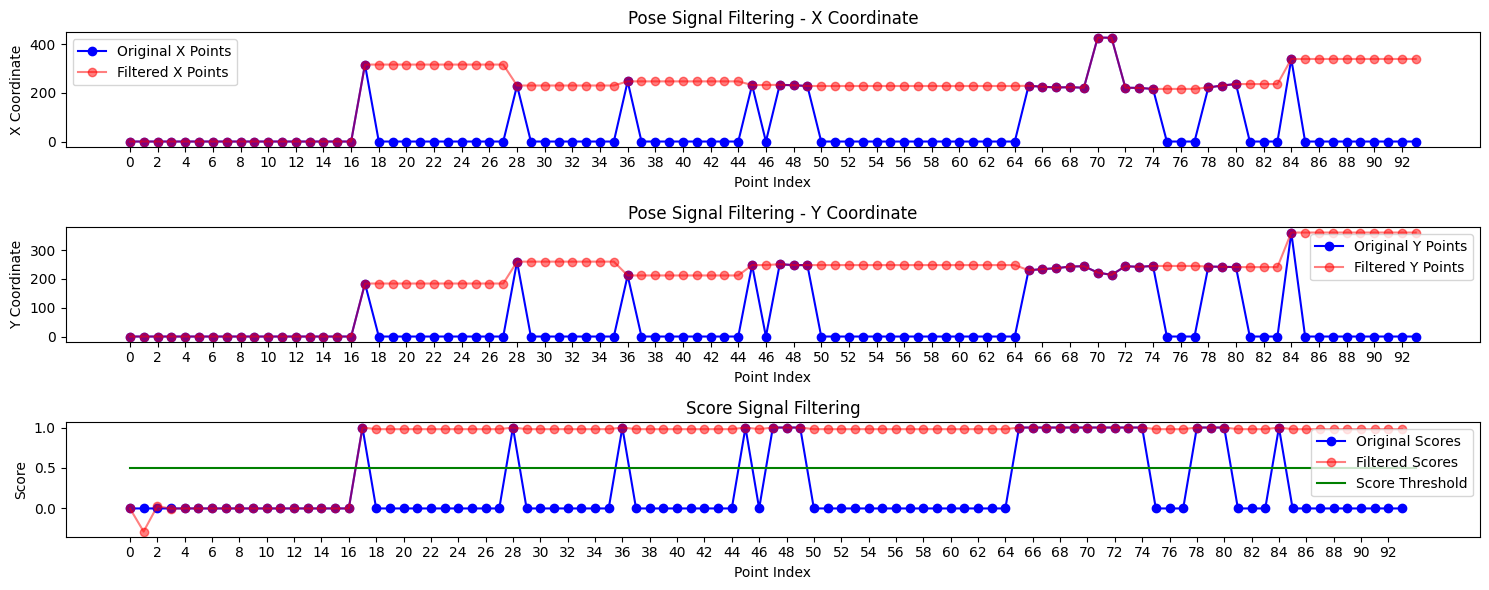

In [24]:

for id in [91,100,112,121]:#99
    
    # Inicializar los filtros adaptativos para cada keypoint
    num_keypoints = 10  # o 135*2 = 270 points
    adaptive_filters = initialize_adaptive_filter(num_keypoints,mu=1.05)
    memories = [KeypointMemory(window=100) for _ in range(num_keypoints)]
    
    
    # Coordinates x,y of index 99 and scores of pose estimation model
    points_x      = list_keypoints[:,id,0] 
    points_y      = list_keypoints[:,id,1]
    scores_points = list_scores[:,id]
    
    points_x_pred      = np.zeros_like(points_x)
    points_y_pred      = np.zeros_like(points_y)
    scores_points_pred = np.zeros_like(scores_points)
    
    # Simulation of filtering of coordinates frame by frame
    for i in range(len(points_x)):
        keyp_aux   = [[points_x[i],points_y[i]]]
        scores_aux = [scores_points[i]]
        
        # filtering data (TO DO)
        #print("keyp_aux.shape:",np.array(keyp_aux).shape) # (1,2)
        #print("scores_aux.shape:",np.array(scores_aux).shape) # (1,)
        keyp_pred,scores_pred = track_keypoints(i,keyp_aux,scores_aux, adaptive_filters,memories)
        
        # save data predicted
        points_x_pred[i] = keyp_pred[0][0]
        points_y_pred[i] = keyp_pred[0][1]
        scores_points_pred[i] = scores_pred[0]
    
    
    n = len(points_x)
    fig = plt.figure(figsize=(15,6))
    
    plt.subplot(3,1,1)
    plt.plot(points_x, '-ob', label='Original X Points')
    plt.plot(points_x_pred, '-or', alpha=0.5, label='Filtered X Points')
    plt.xticks(np.arange(0, n, step=2))
    plt.xlabel('Point Index')
    plt.ylabel('X Coordinate')
    plt.title('Pose Signal Filtering - X Coordinate')
    plt.legend()
    
    plt.subplot(3,1,2)
    plt.plot(points_y, '-ob', label='Original Y Points')
    plt.plot(points_y_pred, '-or', alpha=0.5, label='Filtered Y Points')
    plt.xticks(np.arange(0, n, step=2))
    plt.xlabel('Point Index')
    plt.ylabel('Y Coordinate')
    plt.title('Pose Signal Filtering - Y Coordinate')
    plt.legend()
    
    plt.subplot(3,1,3)
    plt.plot(scores_points, '-ob', label='Original Scores')
    plt.plot(scores_points_pred, '-or', alpha=0.5, label='Filtered Scores')
    plt.plot([0, len(points_x)], [0.5, 0.5], '-g', label='Score Threshold')
    plt.xticks(np.arange(0, n, step=2))
    plt.xlabel('Point Index')
    plt.ylabel('Score')
    plt.title('Score Signal Filtering')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [25]:
list_scores

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], dtype=float32)

In [26]:
keyp_pred

array([[339, 361]])

In [27]:
import traceback
import numpy as np
import time

# define a video capture object 
#vid = cv2.VideoCapture("/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Datasets/wlasl-complete/videos/17165.mp4")#68508.mp4")#54563.mp4")#68914.mp4") 


num_keypoints = 133


adaptive_filters = initialize_adaptive_filter(num_keypoints,mu=1.05)
memories = [KeypointMemory(window=100) for _ in range(num_keypoints)]


#vid = cv2.VideoCapture("/media/cristian/12FF1F6D0CD48422/Research/Gloss/Gloss/Datasets/WLASL/wlasl-complete-21k/videos/17165.mp4")
vid = cv2.VideoCapture("../../data/videos/17165.mp4")

#vid = cv2.VideoCapture(0)
cv2.namedWindow("frame", cv2.WINDOW_NORMAL) 

list_keypoints_new = []
list_scores_new = []
cnt = 0

while(True): 
    
    ret, frame = vid.read() 
    if ret is None or frame is None:
        break
    
    frame = cv2.resize(frame,(640,480))
    
    try:
        frame_rgb = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

        
        #POSE ESTIMATION MODEL
        keypoints, scores  = model.predict(frame_rgb)
        list_keypoints_new.append(keypoints[0,:,:])
        list_scores_new.append(scores[0,:])
        
        # FILTERING
        keypoints_filtered       = np.zeros_like([[[0,0] for i in range(num_keypoints)]])
        scores_filtered          = np.zeros_like([[0 for i in range(num_keypoints)]])
        keyp_pred,scores_pred = track_keypoints(cnt,keypoints[0,:,:],scores[0,:], adaptive_filters,memories)            
        keypoints_filtered[0]  = keyp_pred
        scores_filtered[0]     = scores_pred
        
        
        #DRAWING        
        frame_original = draw_skeleton(copy.deepcopy(frame), keypoints_filtered, scores_filtered, kpt_thr=kpt_thr,
                                    line_width=1,radius=1)
        
       
        score_value = np.round(scores[0,99],2)
        key_p1 = np.round(keypoints[0,99,0],2)
        key_p2 = np.round(keypoints[0,99,1],2)
        cnt+=1        

        frame_original = cv2.putText(frame_original, 
                    f'point 99:i={cnt},s={str(score_value)[:4]},k={str(key_p1)[:6]},{str(key_p2)[:6]}', 
                    (10, 30) ,cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0) , 2, cv2.LINE_AA) 
        
        cv2.imshow('frame', frame_original) 
        #cv2.waitKey()

        # DELAY TO SEE THE VIDEO SLOWLY
        time.sleep(0.2)
        
        if cv2.waitKey(1) & 0xFF == ord('q'): 
            break
    except:
        print(traceback.format_exc())
        break
    
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 